In [264]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [265]:
data=pd.read_csv('city_day.csv')
data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [266]:
data.shape


(29531, 16)

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [268]:
data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [269]:
data.duplicated().value_counts()

False    29531
Name: count, dtype: int64

In [270]:
data=data.dropna()

In [271]:
data.shape

(6236, 16)

In [272]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,61.327365,123.418321,17.015191,31.708190,32.448956,20.737070,0.984344,11.514426,36.127691,3.700361,10.323696,2.557439,140.510103
std,53.709682,85.791491,20.037836,18.784041,27.388129,16.088215,1.356161,7.166113,19.553695,5.062159,12.287223,4.535060,92.738826
min,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,0.710000,1.550000,0.000000,0.000000,0.000000,23.000000
25%,27.927500,66.970000,5.080000,15.977500,14.547500,10.390000,0.490000,6.557500,22.357500,0.910000,2.210000,0.300000,78.000000
50%,47.490000,103.010000,10.060000,28.900000,24.285000,14.690000,0.730000,9.875000,32.540000,2.435000,6.310000,1.250000,112.000000
75%,73.442500,150.770000,19.392500,43.632500,39.622500,28.545000,1.060000,14.430000,45.512500,4.620000,13.040000,3.030000,166.000000
max,639.190000,796.880000,159.220000,140.170000,224.090000,166.700000,16.230000,70.390000,162.330000,64.440000,103.000000,125.180000,677.000000


In [273]:
##Checks duplicate values 
data.duplicated().sum()

0

In [274]:
##Drop irrelevant columns  
data=data.drop(['City','Date','AQI_Bucket'],axis=1)
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [275]:
data=data.reset_index(drop=True) 
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
1,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
3,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
4,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
6232,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
6233,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
6234,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


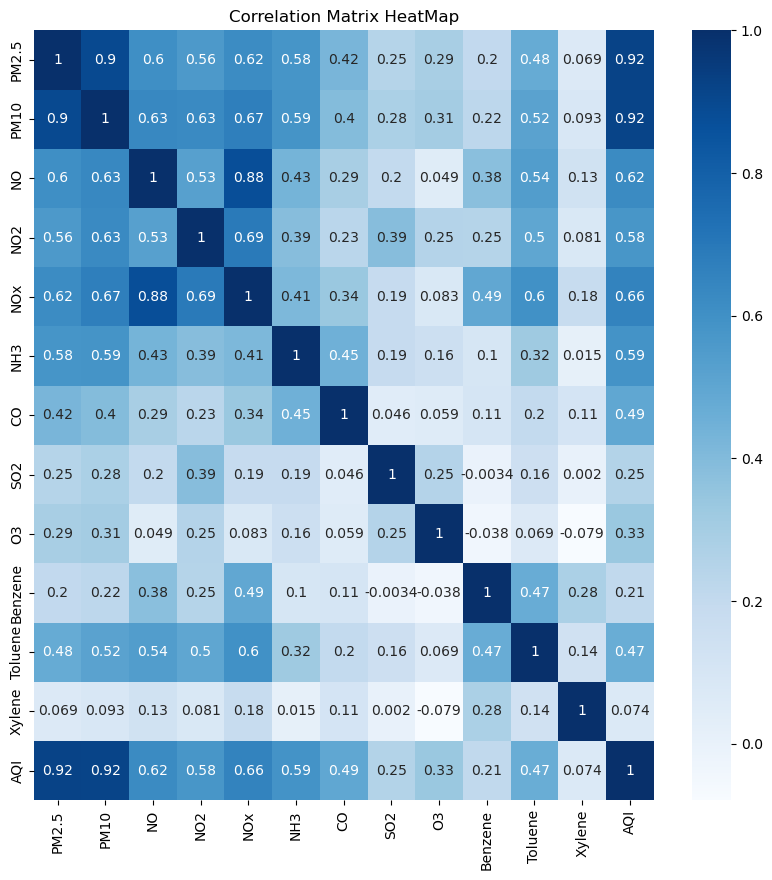

In [276]:
##Corelaton Matrix 
corr_mat=data.corr() 
plt.figure(figsize=(10,10)) 
sns.heatmap(corr_mat,annot=True,cmap='Blues') 
plt.title("Correlation Matrix HeatMap")    
plt.show()



In [277]:
col_names=data.columns 
col_names

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [278]:
 ##Removing Xylene because it has negligible impact on AQI according to the correlation matrix
data=data.drop(['Xylene'],axis=1) 
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,184.0
1,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,197.0
2,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,198.0
3,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,188.0
4,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6231,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,47.0
6232,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0
6233,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0
6234,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0


In [279]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


In [280]:
X=data.iloc[ : , :-1] 
y=data['AQI']

In [281]:
feat_columns=X.columns 
feat_columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene'],
      dtype='object')

In [282]:
print(X.shape) 
print(y.shape)

(6236, 11)
(6236,)


In [283]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [284]:
linear_model=LinearRegression() 
linear_model.fit(X_train,y_train)

LinearRegression()

In [285]:
linear_pred=linear_model.predict(X_test) 
linear_pred

array([ 68.87801823, 244.06196653, 102.4683891 , ..., 394.21295795,
       155.76641114,  72.66777514])

In [286]:
print(linear_model.score(X_train,y_train))
print(linear_model.score(X_test,y_test))

0.9091660603249849
0.9216592994039071


In [287]:
print('Intercept:',linear_model.intercept_) 
print('Slope:',linear_model.coef_)

Intercept: 15.001327589539358
Slope: [ 0.79737753  0.43473811 -0.02567336 -0.1819445   0.3580289   0.03386315
  7.73015903  0.02916353  0.32611251 -0.25552011 -0.19677839]


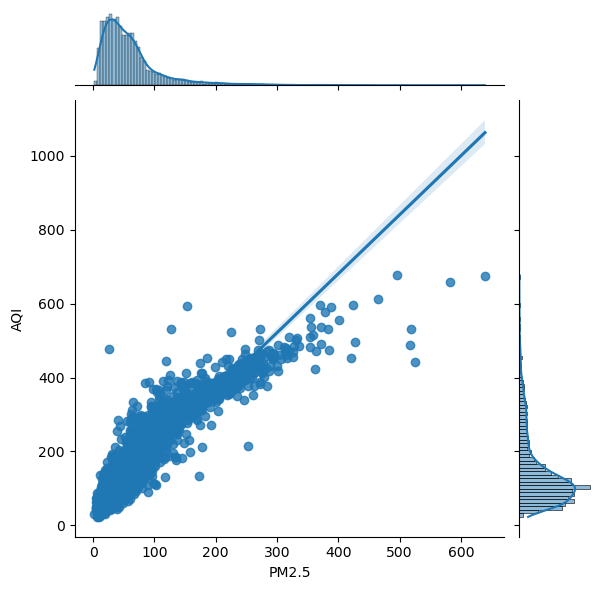

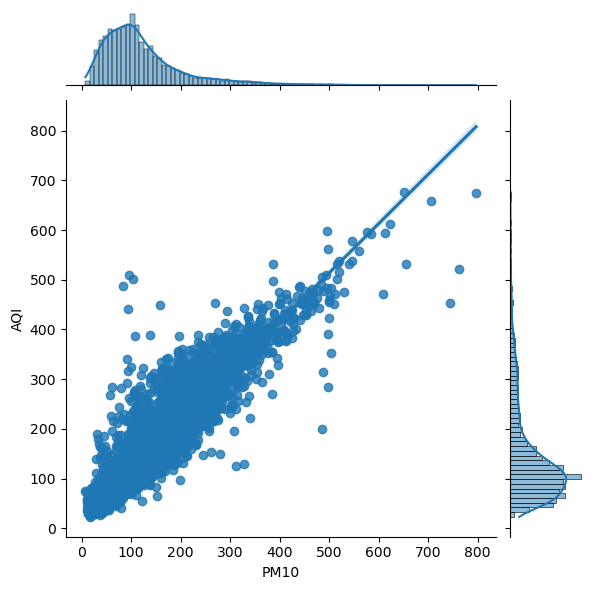

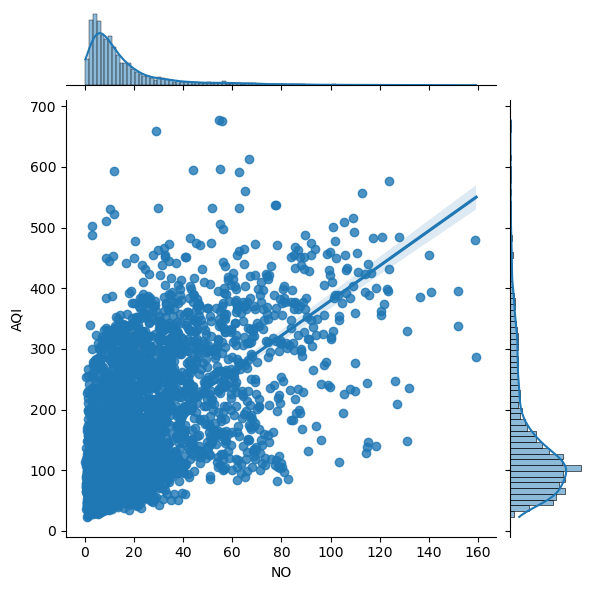

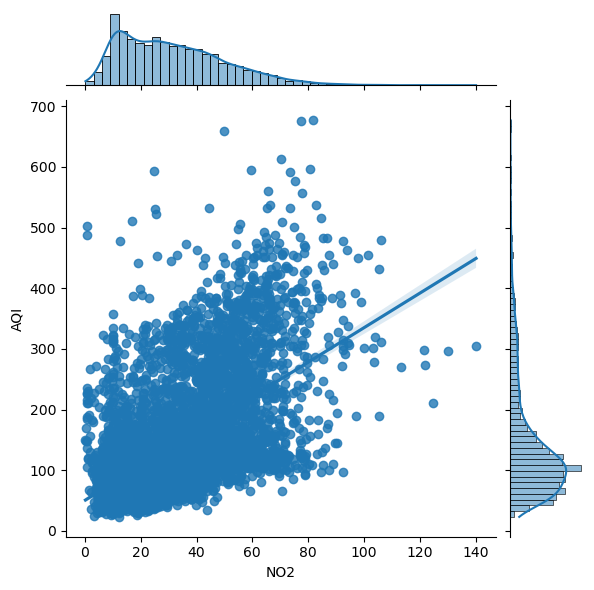

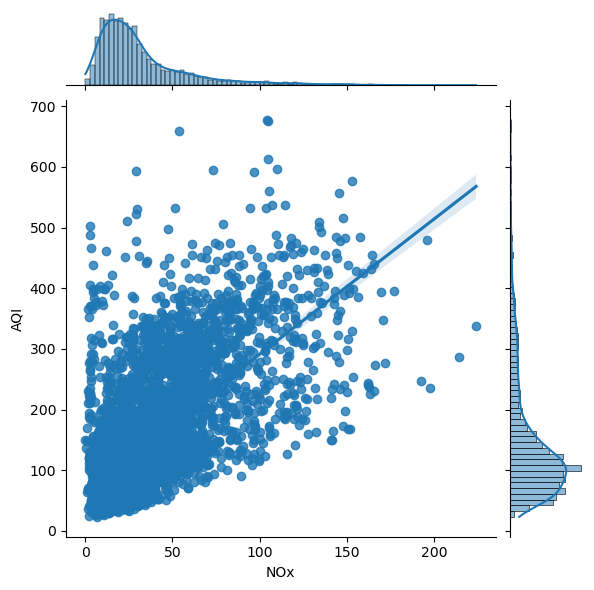

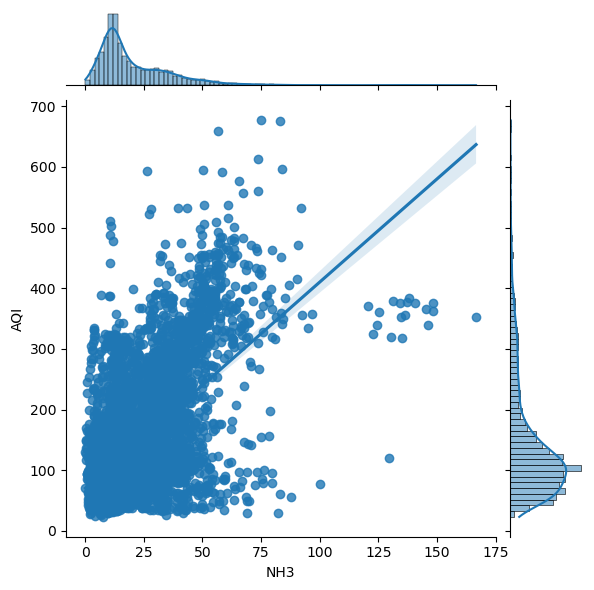

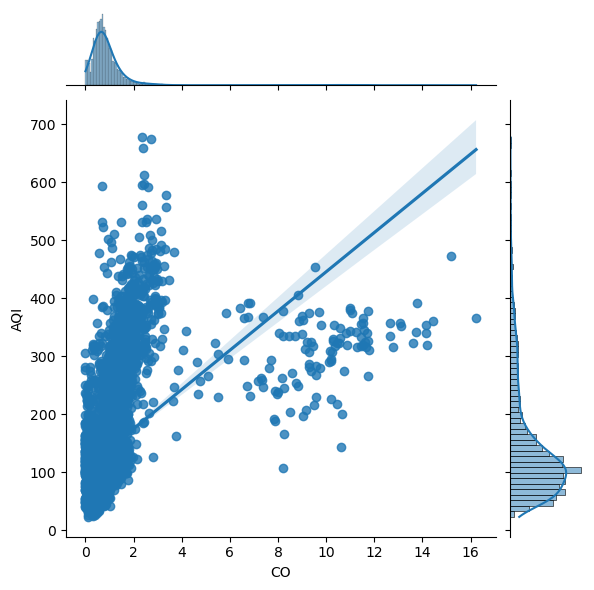

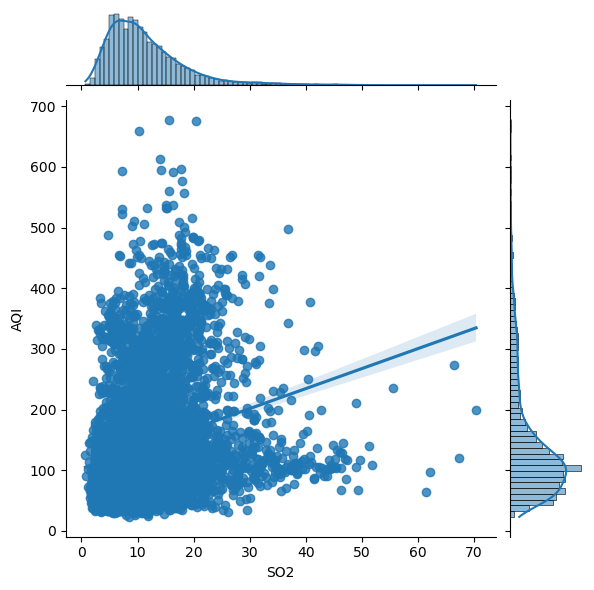

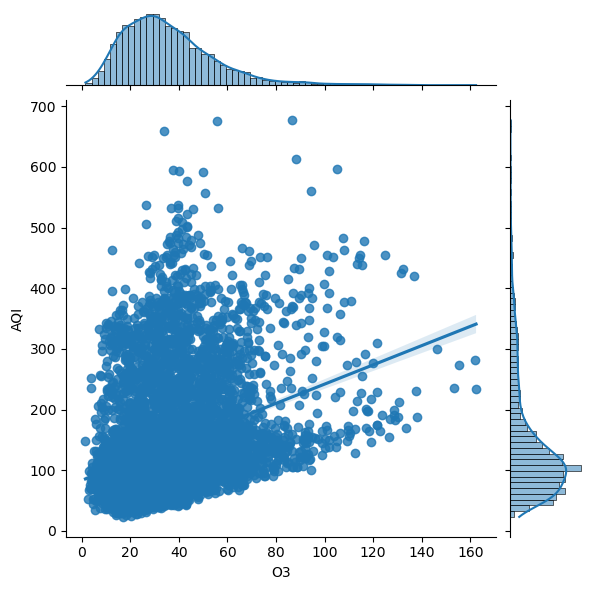

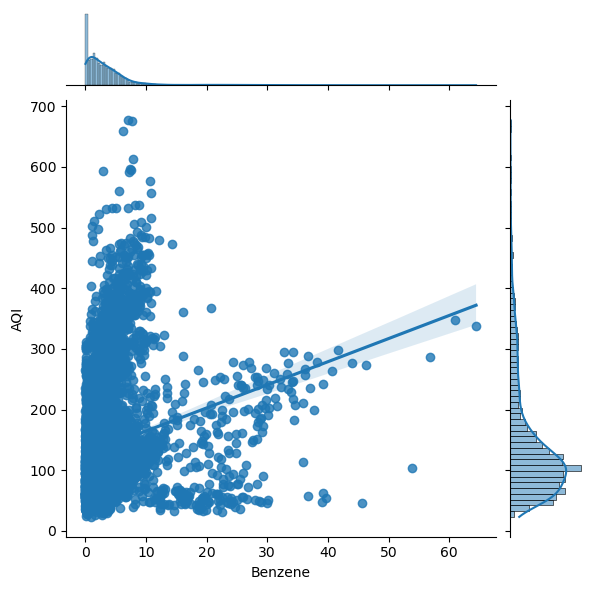

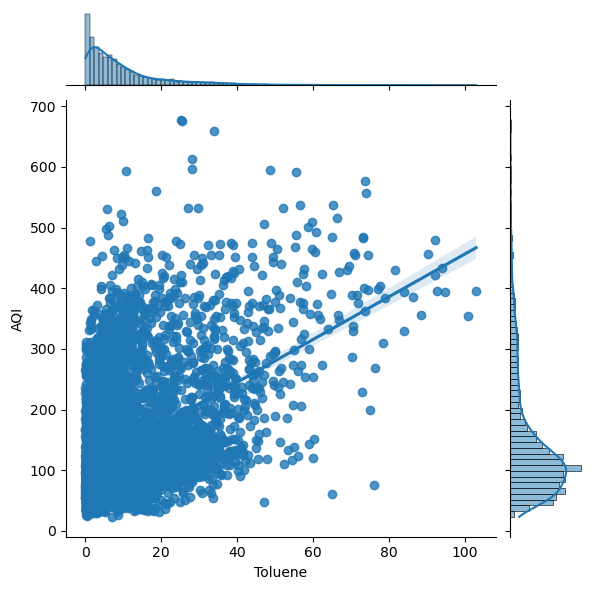

In [288]:
for col in feat_columns: 
    sns.jointplot(x=data[col],y="AQI",data=data,kind="reg") 
 
plt.show()


0.8589223649296839


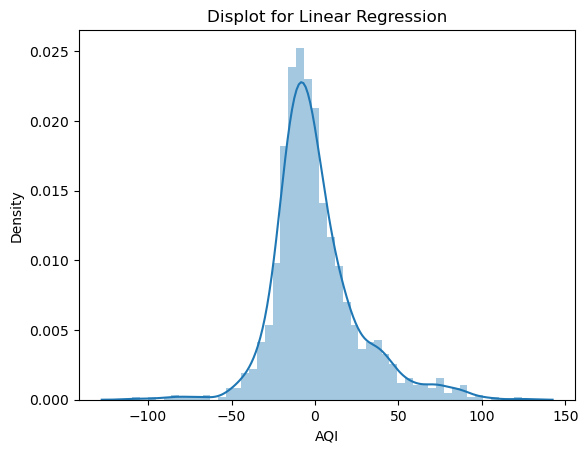

In [289]:
from sklearn.model_selection import cross_val_score  
score=cross_val_score(linear_model,X,y,cv=5)  
print(score.mean())
linear_pred_cv=linear_model.predict(X_test) 
sns.distplot(y_test-linear_pred_cv)   
plt.title("Displot for Linear Regression") 
plt.show()

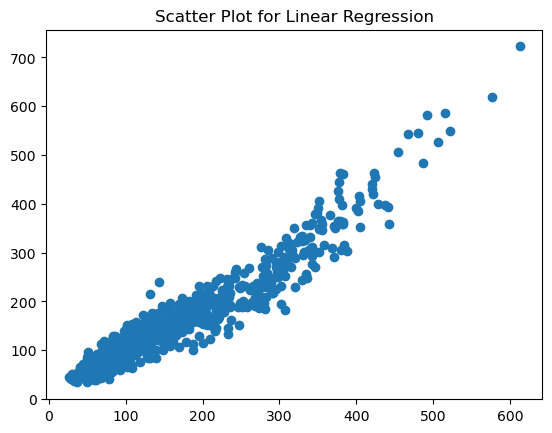

In [290]:
plt.scatter(y_test,linear_pred) 
plt.title("Scatter Plot for Linear Regression") 
plt.show()

In [291]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error 
from sklearn.metrics import r2_score

In [292]:
print("MAE:",mean_absolute_error(y_test,linear_pred_cv)) 
print("MSE:",mean_squared_error(y_test,linear_pred_cv)) 
print("RMSE:",root_mean_squared_error(y_test,linear_pred_cv))

MAE: 18.17595556992588
MSE: 651.8111171322477
RMSE: 25.530591789699034


In [293]:
linear_r2=r2_score(y_test,linear_pred_cv) 
print("Linear Model r2 Score",linear_r2)

Linear Model r2 Score 0.9216592994039071


DECISION TREE MODEL

In [294]:
from sklearn.tree import DecisionTreeRegressor  
dt_reg=DecisionTreeRegressor(criterion='squared_error') 
dt_reg.fit(X_train,y_train)


DecisionTreeRegressor()

In [295]:
dt_pred=dt_reg.predict(X_test) 
dt_pred

array([ 78., 277.,  97., ..., 359., 143.,  62.])

In [296]:
print(dt_reg.score(X_train,y_train)) 
print(dt_reg.score(X_test,y_test))

1.0
0.8956946881543417


Model is Overfitting

In [297]:
##Cross Validation 
dt_score=cross_val_score(dt_reg,X,y,cv=5) 
dt_score.mean()

0.7842095026916261

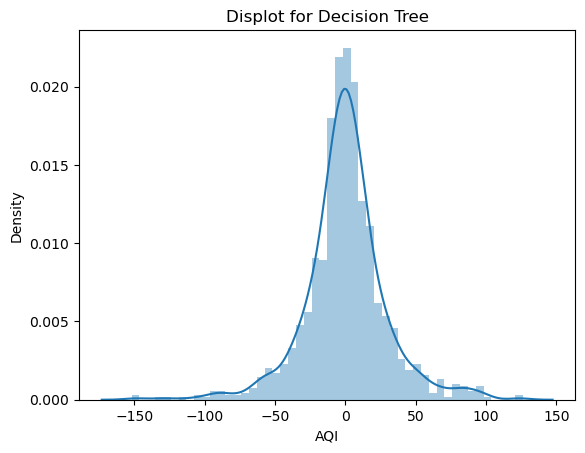

In [298]:
dt_pred_cv=dt_reg.predict(X_test) 
sns.distplot(y_test-dt_pred_cv)   
plt.title("Displot for Decision Tree")
plt.show()

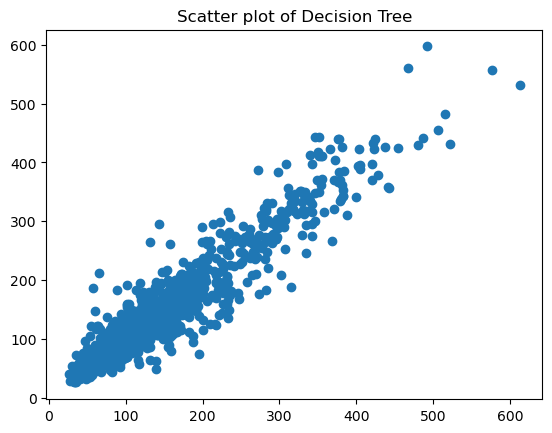

In [299]:
plt.scatter(y_test,dt_pred_cv)  
plt.title("Scatter plot of Decision Tree")
plt.show()

In [300]:
print("MAE:",mean_absolute_error(y_test,dt_pred_cv)) 
print("MSE:",mean_squared_error(y_test,dt_pred_cv))  
print("RMSE:",root_mean_squared_error(y_test,dt_pred_cv)) 

MAE: 20.11778846153846
MSE: 867.8421474358975
RMSE: 29.45916067093388


In [301]:
dt_r2=r2_score(y_test,dt_pred_cv) 
print("Decision Tree Model R2 Score",dt_r2)

Decision Tree Model R2 Score 0.8956946881543417


In [302]:
from sklearn.model_selection import GridSearchCV

In [303]:
params={
 'criterion':['squared_error','friedman_mse','absolute_error',None],
  'splitter':['best','random'],
  'max_depth':[1,3,5,7,9,11,12,15],
  'max_features':['auto', 'sqrt', 'log2',None], 
  'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
}

In [304]:
dt_hyper=GridSearchCV(dt_reg,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [305]:
dt_hyper.fit(X_train,y_train)

Fitting 10 folds for each of 2560 candidates, totalling 25600 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', None],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [306]:
print(dt_hyper.best_params_) 
print(dt_hyper.best_score_)

{'criterion': 'absolute_error', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 70, 'splitter': 'best'}
-718.6267904282461


In [307]:
tuned_pred_dt=dt_hyper.predict(X_test)

In [308]:
dt_hyper_r2=r2_score(y_test,tuned_pred_dt) 
print("Tuned Decision Tree r2 Score",dt_hyper_r2)

Tuned Decision Tree r2 Score 0.9193971095516494


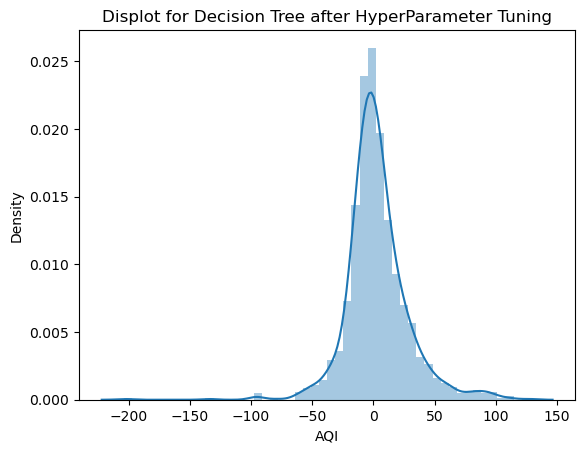

In [309]:
sns.distplot(y_test-tuned_pred_dt)  
plt.title("Displot for Decision Tree after HyperParameter Tuning")
plt.show()

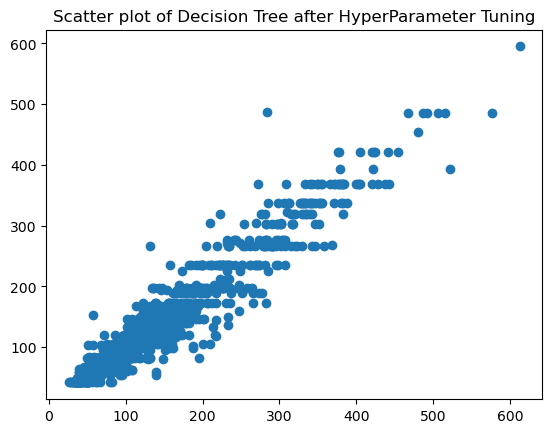

In [310]:
plt.scatter(y_test,tuned_pred_dt) 
plt.title("Scatter plot of Decision Tree after HyperParameter Tuning")
plt.show()

In [311]:
best_estimator_dt=dt_hyper.best_estimator_

In [312]:
print("MAE:",mean_absolute_error(y_test,tuned_pred_dt)) 
print("MSE:",mean_squared_error(y_test,tuned_pred_dt))  
print("RMSE:",root_mean_squared_error(y_test,tuned_pred_dt)) 

MAE: 17.373397435897434
MSE: 670.6330128205128
RMSE: 25.89658303368444


RANDOM FOREST REGRESSOR

In [313]:
from sklearn.ensemble import RandomForestRegressor 
rf_model=RandomForestRegressor(n_estimators=200,random_state=42) 
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [314]:
rf_pred=rf_model.predict(X_test) 
rf_pred

array([ 63.875, 274.925,  98.865, ..., 389.815, 129.445,  69.36 ])

In [315]:
print(rf_model.score(X_train,y_train)) 
print(rf_model.score(X_test,y_test))

0.9917991644003847
0.9487566226262869


In [316]:
print("MAE:",mean_absolute_error(y_test,rf_pred)) 
print("MSE:",mean_squared_error(y_test,rf_pred))  
print("RMSE:",root_mean_squared_error(y_test,rf_pred)) 

MAE: 13.863213141025641
MSE: 426.35568481570516
RMSE: 20.648382135550115


In [317]:
rf_r2=r2_score(y_test,rf_pred) 
print("Random Forest r2 Score",rf_r2)

Random Forest r2 Score 0.9487566226262869


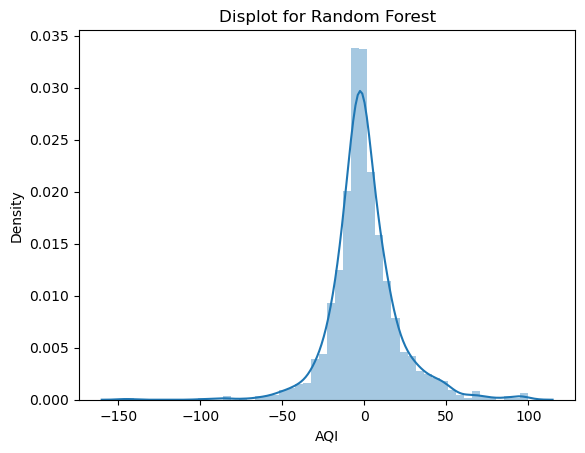

In [318]:
sns.distplot(y_test-rf_pred)  
plt.title("Displot for Random Forest")
plt.show()

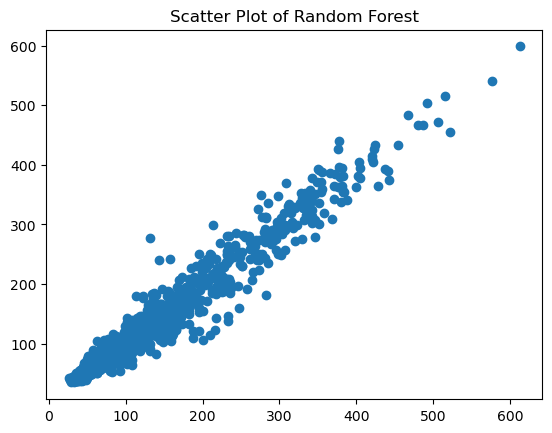

In [319]:
plt.scatter(y_test,rf_pred) 
plt.title("Scatter Plot of Random Forest") 
plt.show()

Hyperparameter Tuning of Random Forest Regressor

In [320]:
from sklearn.model_selection import RandomizedSearchCV

In [321]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=100,num=10)] 
max_features=['auto','sqrt'] 
max_depth = [int(x) for x in np.linspace(5,30, num =6)]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,12]  
random_grid={'n_estimators':n_estimators, 
             'max_features':max_features, 
             'max_depth':max_depth, 
             'min_samples_split':min_samples_split, 
             'min_samples_leaf':min_samples_leaf
             } 


In [360]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter =100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=200,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 12],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [361]:
rf_pred_hyper=rf_random.predict(X_test)


In [362]:
print(rf_random.score(X_train,y_train)) 
print(rf_random.score(X_test,y_test))

0.985244865661966
0.9463801912294002


In [363]:
print("MAE:",mean_absolute_error(y_test,rf_pred_hyper)) 
print("MSE:",mean_squared_error(y_test,rf_pred_hyper))  
print("RMSE:",root_mean_squared_error(y_test,rf_pred_hyper)) 

MAE: 14.107993138340781
MSE: 446.12809419941823
RMSE: 21.121744582288137


In [364]:
rf_hyper_r2=r2_score(y_test,rf_pred_hyper) 
print("Random Forest r2 Score",rf_hyper_r2)

Random Forest r2 Score 0.9463801912294002


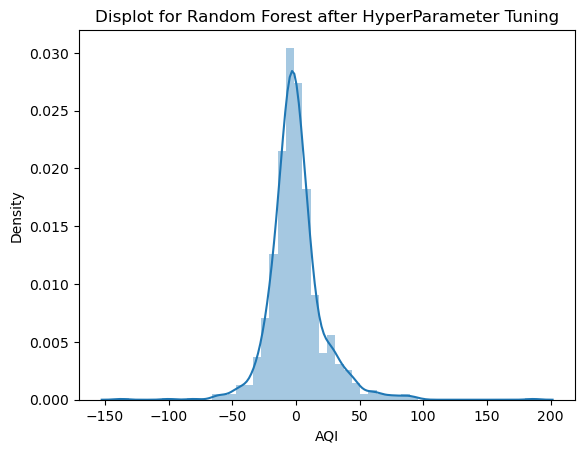

In [365]:
sns.distplot(y_test-rf_pred_hyper)  
plt.title("Displot for Random Forest after HyperParameter Tuning")
plt.show()

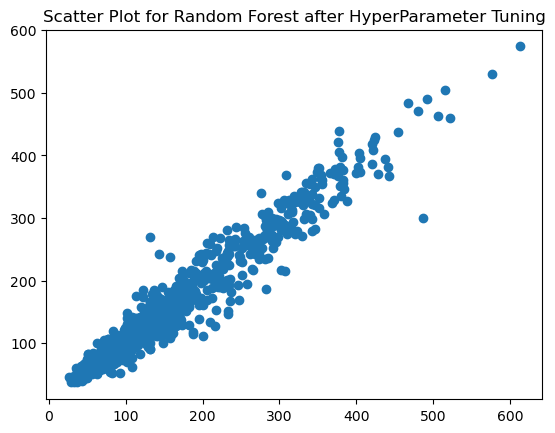

In [366]:
plt.scatter(y_test,rf_pred_hyper)   
plt.title("Scatter Plot for Random Forest after HyperParameter Tuning") 
plt.show()

In [367]:
from sklearn.naive_bayes import GaussianNB  
gnb=GaussianNB() 
gnb.fit(X_train,y_train)

GaussianNB()

In [368]:
gnb_pred=gnb.predict(X_test)

In [369]:
print(gnb.score(X_train,y_train)) 
print(gnb.score(X_test,y_test))

0.11206896551724138
0.023237179487179488


In [375]:
from sklearn.metrics import accuracy_score 
gnb_accuracy=accuracy_score(y_test,gnb_pred) 
gnb_accuracy

0.023237179487179488

Gaussian NB is used  for classification tasks,this explains the low accuracy 

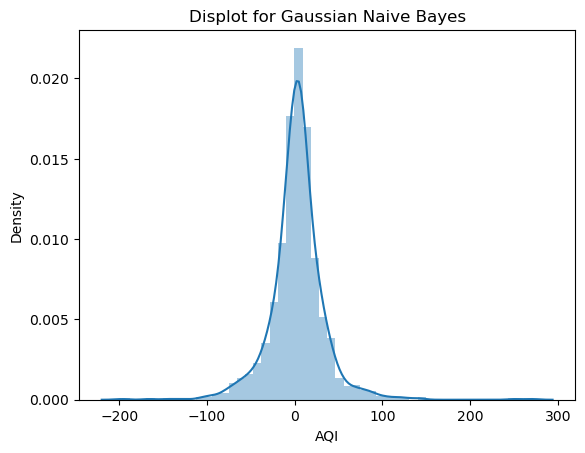

In [372]:
sns.distplot(y_test-gnb_pred)  
plt.title("Displot for Gaussian Naive Bayes")
plt.show()

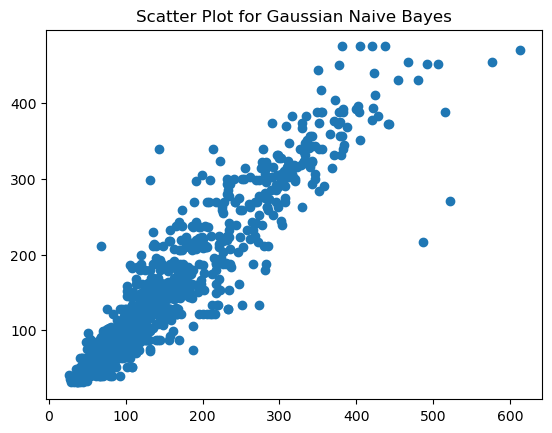

In [373]:
plt.scatter(y_test,gnb_pred)   
plt.title("Scatter Plot for Gaussian Naive Bayes") 
plt.show()

Artificial Neural Network Implementation 


In [336]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping

In [337]:
(X_train.shape[1],)

(11,)

In [377]:
model = Sequential([Dense(128, activation='relu', input_shape=(X_train.shape[1],)), 
                    Dense(1)  
])

In [350]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

In [351]:
import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01) 
loss=tensorflow.keras.losses.MSE

In [352]:
model.compile(optimizer=opt,loss="mse",metrics=['mae'])

In [353]:
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)

In [354]:
history=model.fit(X_train,y_train, 
                  validation_data=(X_test,y_test),epochs=100, 
                  callbacks=[early_stopping_callback])

Epoch 1/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4004.1536 - mae: 36.8910 - val_loss: 735.5627 - val_mae: 19.0455
Epoch 2/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 903.6012 - mae: 19.5150 - val_loss: 695.9161 - val_mae: 18.4857
Epoch 3/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1059.1289 - mae: 20.3200 - val_loss: 704.2852 - val_mae: 17.8509
Epoch 4/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 875.9388 - mae: 18.8653 - val_loss: 660.3428 - val_mae: 17.4560
Epoch 5/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 799.4748 - mae: 18.4800 - val_loss: 878.7486 - val_mae: 19.2688
Epoch 6/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 848.0710 - mae: 19.0608 - val_loss: 727.9702 - val_mae: 19.9719
Epoch 7/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 899.4208 - mae: 19.2559 - val_loss: 650.7480 - val_mae: 17.6780
Epoch 8/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 878.1566 - mae: 19.0284 - val_loss: 899.1609 - val_mae: 19.978

In [355]:
y_pred_nn = model.predict(X_test)
nn_r2 = r2_score(y_test, y_pred)
print("ANN r2 Score:", nn_r2)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN r2 Score: 0.9417643570597697


In [356]:
print("MAE:",mean_absolute_error(y_test,y_pred_nn)) 
print("MSE:",mean_squared_error(y_test,y_pred_nn))  
print("RMSE:",root_mean_squared_error(y_test,y_pred_nn)) 

MAE: 16.065299443709545
MSE: 519.8325315198402
RMSE: 22.79983621695209


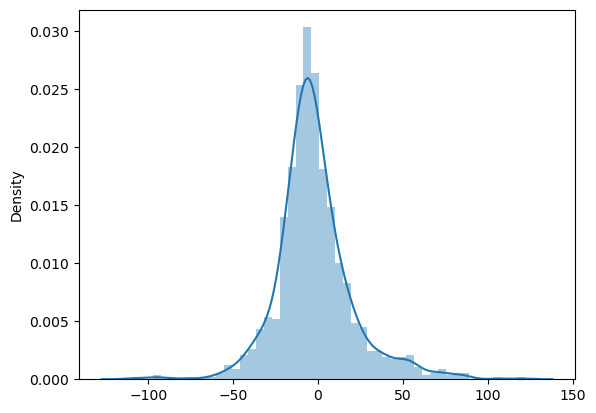

In [357]:
sns.distplot(y_test.values.reshape(-1,1)-y_pred_nn) 
plt.show()

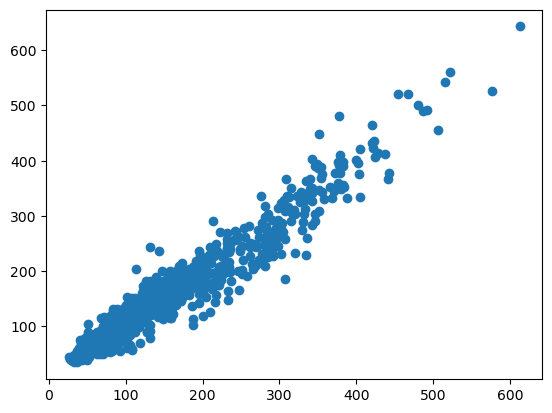

In [358]:
plt.scatter(y_test,y_pred_nn) 
plt.show()


In [378]:
print("Linear Regression",linear_r2) 
print("Decision Tree ",dt_hyper_r2) 
print("Random Forest Regressor",rf_hyper_r2) 
print("Artificial Neural Network",nn_r2)

Linear Regression 0.9216592994039071
Decision Tree  0.9193971095516494
Random Forest Regressor 0.9463801912294002
Artificial Neural Network 0.9417643570597697
